< cv2.dnn.Net 000001BD8E88AB90>
4 108 148 298
-3 100 205 317
250 98 152 313
2 115 150 315
-4 105 205 328
202 153 239 241
85 176 470 218
71 193 499 226
101 111 112 161
102 118 109 172
181 239 90 61
180 240 119 59
133 281 29 24
132 280 32 25
137 282 27 24
135 282 32 22


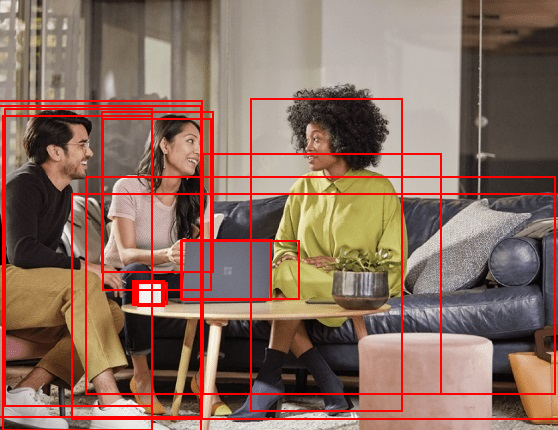

In [ ]:
import cv2
from PIL import Image, ImageDraw
import numpy as np

weights_path = "yolo/yolov3.weights"
config_path = "yolo/yolov3.cfg"
names_path = "yolo/coco.names"

with open(names_path, 'r', encoding='utf-8') as file:
    label_list = file.read().strip().split("\n")

net = cv2.dnn.readNet(weights_path, config_path)
print(net)

def detect_object(image_array):
    # 아래 주석은 현재 코드에서는 RGB형태가 아니지만 gradio에서는 제대로 보일 것이기 때문에 불필요한 코드임.
    # image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

    image = Image.fromarray(image_array.copy())
    draw = ImageDraw.Draw(image)

    height, width = image_array.shape[:2]
    blob = cv2.dnn.blobFromImage(image_array, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layer_name_list = net.getLayerNames()
    out_layer_list = net.getUnconnectedOutLayersNames()
    detection_list = net.forward(out_layer_list)
    
    for prediction_list in detection_list:
        #yolo82, yolo94, yolo 106
        for prediction in prediction_list:
            score_list = prediction[5:]
            label_index = np.argmax(score_list)
            confidence = score_list[label_index]
            if confidence > 0.5:
                bounding_box = prediction[:4] * np.array([width, height, width, height])
                center_x, center_y, w, h = bounding_box.astype('int')
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                print(x, y, w, h)

                draw.rectangle([(x, y), (x + w, y + h)], outline='red', width=2)

    return image


test_image = cv2.imread("C:/Users/USER/Downloads/ImageTaggingSample1-fd324157.jpg")
detect_object(test_image)